<a href="https://colab.research.google.com/github/Ddasunsandeepa/DeepLearning-with-Tensorflow/blob/dev/03.Tensorflow_model_save%26load/TF_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf


In [49]:
x = tf.range(0,100 , 2)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [50]:
y = 2*x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,
        62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110,
       114, 118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 162,
       166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206], dtype=int32)>

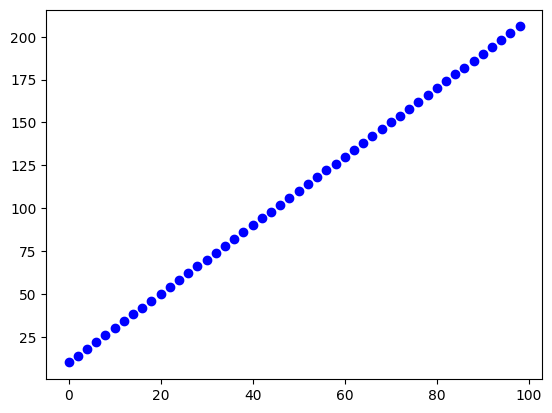

In [51]:
import matplotlib.pyplot as plt
plt.scatter(x,y,c='b')
plt.show()

In [52]:
x.shape

TensorShape([50])

In [53]:
xx = tf.expand_dims(x,axis=1)
xx

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[ 0],
       [ 2],
       [ 4],
       [ 6],
       [ 8],
       [10],
       [12],
       [14],
       [16],
       [18],
       [20],
       [22],
       [24],
       [26],
       [28],
       [30],
       [32],
       [34],
       [36],
       [38],
       [40],
       [42],
       [44],
       [46],
       [48],
       [50],
       [52],
       [54],
       [56],
       [58],
       [60],
       [62],
       [64],
       [66],
       [68],
       [70],
       [72],
       [74],
       [76],
       [78],
       [80],
       [82],
       [84],
       [86],
       [88],
       [90],
       [92],
       [94],
       [96],
       [98]], dtype=int32)>

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics = ['MAE']
)

model.fit(tf.expand_dims(x,axis=1),y,epochs=20)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - MAE: 108.0151 - loss: 108.0151 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - MAE: 58.4811 - loss: 58.4811
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - MAE: 17.8488 - loss: 17.8488
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - MAE: 18.6848 - loss: 18.6848
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - MAE: 21.0698 - loss: 21.0698
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - MAE: 7.1392 - loss: 7.1392
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - MAE: 10.6082 - loss: 10.6082
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - MAE: 6.7773 - loss: 6.7773
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - MAE: 6.4976 - loss: 6.4976
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - MAE: 5.8864 - loss: 5.8864
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - MAE: 4.8210 - loss: 4.8210
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - MAE: 3.7597 - loss: 3.7597
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - MAE: 

In [55]:
import numpy as np

# Convert the list to a NumPy array
input_data = np.array([[150], [-2], [-4]])

# Now, pass it to the model
pred = model.predict(input_data)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[314.8974   ]
 [  0.7619242]
 [ -3.3714375]]


In [56]:
model.save("new_model.h5")  # Save as HDF5 format


In [57]:
n_model = tf.keras.models.load_model('new_model.h5')
input_data = np.array([[150], [-2], [-4]])
pred = n_model.predict(input_data)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[314.8974   ],
       [  0.7619242],
       [ -3.3714375]], dtype=float32)

In [58]:
n_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 14)             │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45 (184.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)